# Etude Statistique sur le paludisme : cas du poste de santé de Rufisque

## Etude statistique Base1_Consultation 

### Importation des Packages

In [1]:
# Importation des packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import fanalysis.mca as MCA
import numpy as np

### Importation et nettoyage des données

In [2]:
#Importer la base de donnée
base1_consultation = pd.read_excel("Base1_Consultation.xlsx")

In [6]:
#Afficher les premiere lignes 
base1_consultation.head()

,Id_Co,Date,Age,Sexe,localité,Palu,Observation,Temperature (T°c),Poids,P_Systolique,P_diastolique,Taux,GC
0,542,2023-08-11,8,Masculin,Dangou,Simple,NonSurveiller,36.0,20.0,NaN,NaN,NaN,NaN
1,543,2023-08-11,10,Masculin,Dangou,Simple,NonSurveiller,36.7,23.0,NaN,NaN,NaN,NaN
2,800,2023-08-16,33,Masculin,Santhiaba,Simple,Surveiller,36.9,NaN,12.0,7.0,93.0,NaN
3,810,2023-08-16,16,Masculin,Darou Rakhman,Simple,NonSurveiller,37.0,44.8,NaN,NaN,NaN,NaN
4,847,2023-08-17,16,Feminin,Dangou,Simple,NonSurveiller,38.5,NaN,NaN,NaN,NaN,1.34


In [7]:
#Type de données dans la base
base1_consultation.dtypes

Id_Co                         int64
Date                 datetime64[ns]
Age                           int64
Sexe                         object
localité                     object
Palu                         object
Observation                  object
Temperature (T°c)           float64
Poids                       float64
P_Systolique                float64
P_diastolique               float64
Taux                        float64
GC                          float64
dtype: object

In [8]:
#Afficher le nombre de lignes et de colonnes 
base1_consultation.shape

(99, 13)

In [10]:
#Analyse des données manquantes
base1_consultation.isna().mean()*100

Id_Co                 0.000000
Date                  0.000000
Age                   0.000000
Sexe                  0.000000
localité              0.000000
Palu                  0.000000
Observation           0.000000
Temperature (T°c)     0.000000
Poids                49.494949
P_Systolique         44.444444
P_diastolique        44.444444
Taux                 51.515152
GC                   67.676768
dtype: float64

In [8]:
#Verification des doublons 

#verifier les doublons 
duplicates = base1_consultation.duplicated()
print(f"Nombres de lignes dupliquées : {duplicates.sum()}")

Nombres de lignes dupliquées : 0


In [9]:
#Analyse de outliers

In [24]:
#Afficher les differentes colonnes
base1_consultation.columns

Index(['Id_Co', 'Date ', 'Age ', 'Sexe', 'localité', 'Palu', 'Observation',
       'Temperature (T°c)', 'Poids ', 'P_Systolique', 'P_diastolique', 'Taux',
       'GC'],
      dtype='object')

In [14]:
#Description de la base de données
base1_consultation.describe(include="all")

,Id_Co,Date,Age,Sexe,localité,Palu,Observation,Temperature (T°c),Poids,P_Systolique,P_diastolique,Taux,GC
count,99.000000,99,99.000000,99,99,99,99,99.000000,50.000000,55.000000,55.000000,48.000000,32.000000
unique,NaN,NaN,NaN,2,15,1,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Masculin,Dangou,Simple,NonSurveiller,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,67,30,99,68,NaN,NaN,NaN,NaN,NaN,NaN
mean,541.323232,2023-09-12 06:32:43.636363520,28.171717,NaN,NaN,NaN,NaN,37.610101,47.776000,20.381818,12.436364,101.833333,1.330625
min,1.000000,2023-07-18 00:00:00,7.000000,NaN,NaN,NaN,NaN,35.500000,20.000000,10.000000,5.000000,70.000000,0.940000
25%,88.500000,2023-09-02 12:00:00,15.000000,NaN,NaN,NaN,NaN,36.800000,26.250000,11.000000,7.000000,88.000000,1.085000
50%,260.000000,2023-09-08 00:00:00,22.000000,NaN,NaN,NaN,NaN,37.500000,47.500000,12.000000,7.000000,102.000000,1.265000
75%,1029.000000,2023-09-19 00:00:00,40.000000,NaN,NaN,NaN,NaN,38.200000,63.750000,13.000000,8.000000,118.000000,1.435000
max,1625.000000,2024-08-24 00:00:00,88.000000,NaN,NaN,NaN,NaN,40.600000,105.000000,166.000000,80.000000,145.000000,2.950000


In [106]:
# Transformer la variable age en variable catégorielle en créant des groupes
# Définir les limites des groupes d'âge
age_bins = [6, 17, 27, 37, 47, 57, 67, 77, 100]

# Définir les labels pour les groupes
age_labels = ['7-17', '17-27', '27-37', '37-47', '47-57', '57-67', '67-77', '77+']

# Créer une nouvelle colonne 'Age_group' en utilisant la fonction cut()
base1_consultation['Age_group'] = pd.cut(base1_consultation['Age '], bins=age_bins, labels=age_labels, right=False)

# Afficher les premières lignes pour vérification
print(base1_consultation.head())


   Id_Co      Date   Age       Sexe       localité    Palu    Observation  \
0    542 2023-08-11     8  Masculin        Dangou   Simple  NonSurveiller   
1    543 2023-08-11    10  Masculin        Dangou   Simple  NonSurveiller   
2    800 2023-08-16    33  Masculin      Santhiaba  Simple     Surveiller   
3    810 2023-08-16    16  Masculin  Darou Rakhman  Simple  NonSurveiller   
4    847 2023-08-17    16   Feminin        Dangou   Simple  NonSurveiller   

   Temperature (T°c)  Poids   P_Systolique  P_diastolique  Taux    GC  \
0               36.0    20.0           NaN            NaN   NaN   NaN   
1               36.7    23.0           NaN            NaN   NaN   NaN   
2               36.9     NaN          12.0            7.0  93.0   NaN   
3               37.0    44.8           NaN            NaN   NaN   NaN   
4               38.5     NaN           NaN            NaN   NaN  1.34   

  Age_group  
0      7-17  
1      7-17  
2     27-37  
3      7-17  
4      7-17  


In [107]:
# Transformer la variable Temperature en variable catégorielle en créant des groupes
# Définir les limites des groupes de temperature
Tpr_bins = [35, 36, 36.5, 37, 37.5, 38, 38.5, 39, 40.70]

# Définir les labels pour les groupes
Tpr_labels = ['35.5-36', '36-36.5', '36.5-37', '37-37.5', '37.5-38', '38-38.5', '38.5-39', '39+']

# Créer une nouvelle colonne 'Tpr_group' en utilisant la fonction cut()
base1_consultation['Trp_group'] = pd.cut(base1_consultation['Temperature (T°c)'], bins=Tpr_bins, labels=Tpr_labels, right=False)

# Afficher les premières lignes pour vérification
print(base1_consultation.head())


   Id_Co      Date   Age       Sexe       localité    Palu    Observation  \
0    542 2023-08-11     8  Masculin        Dangou   Simple  NonSurveiller   
1    543 2023-08-11    10  Masculin        Dangou   Simple  NonSurveiller   
2    800 2023-08-16    33  Masculin      Santhiaba  Simple     Surveiller   
3    810 2023-08-16    16  Masculin  Darou Rakhman  Simple  NonSurveiller   
4    847 2023-08-17    16   Feminin        Dangou   Simple  NonSurveiller   

   Temperature (T°c)  Poids   P_Systolique  P_diastolique  Taux    GC  \
0               36.0    20.0           NaN            NaN   NaN   NaN   
1               36.7    23.0           NaN            NaN   NaN   NaN   
2               36.9     NaN          12.0            7.0  93.0   NaN   
3               37.0    44.8           NaN            NaN   NaN   NaN   
4               38.5     NaN           NaN            NaN   NaN  1.34   

  Age_group Trp_group  
0      7-17   36-36.5  
1      7-17   36.5-37  
2     27-37   36.5-37  
3 

## Analyse Univariées 

### Variables Qualitative

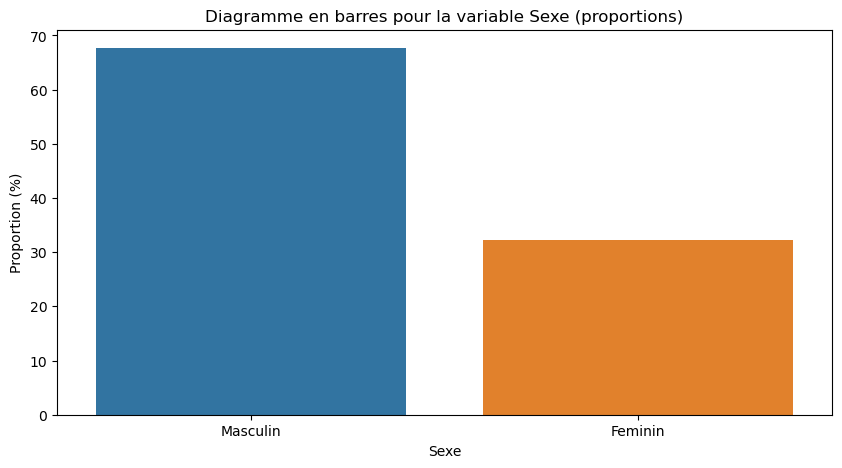

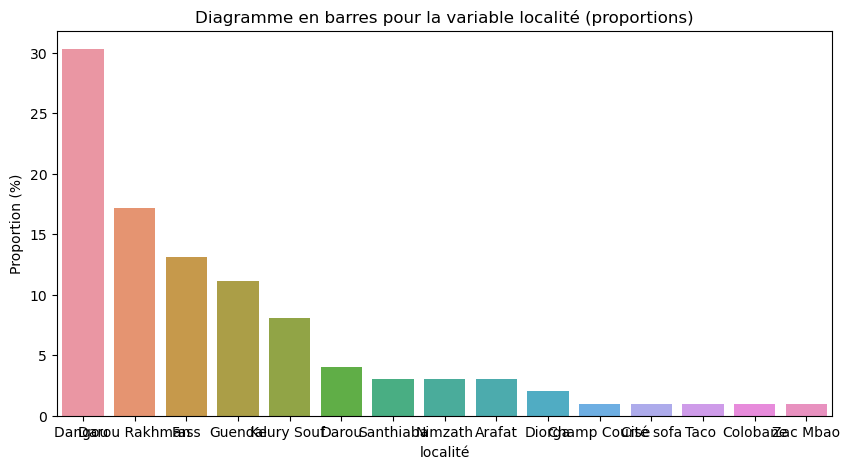

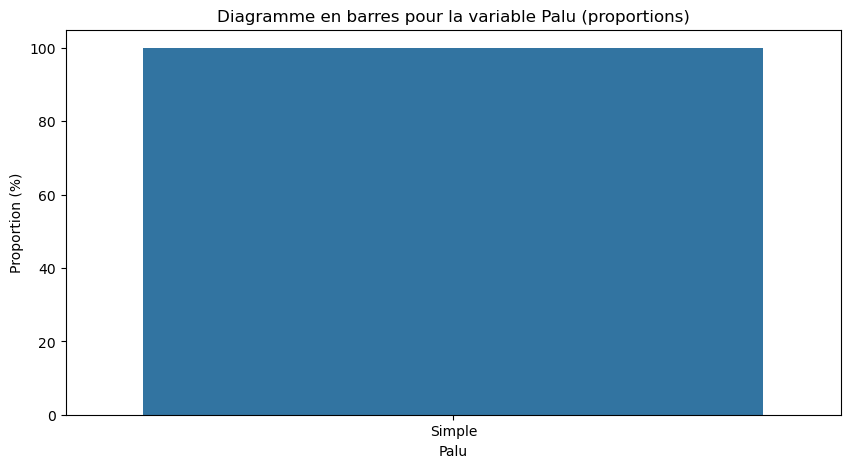

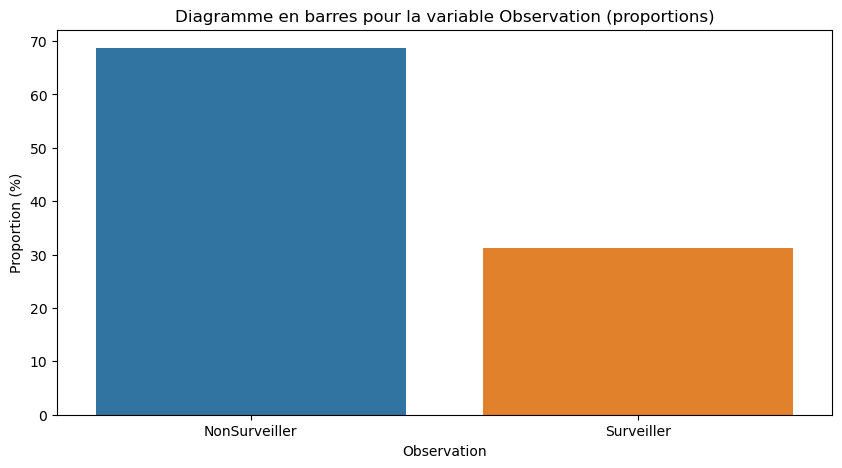

In [40]:
#Afficher les frequences des variables qualitatives 
#Listes des variables qualitatives 
colonne_qualitative = ['Sexe', 'localité', 'Palu', 'Observation'] 



# Créer des graphiques pour les variables qualitatives en termes de proportion
for col in colonne_qualitative:
    plt.figure(figsize=(10, 5))
    proportions = base1_consultation[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

In [41]:

# Afficher les fréquences des variables qualitatives
# Liste des variables qualitatives
colonne_qualitative = ['Sexe', 'localité', 'Palu', 'Observation'] 
for col in colonne_qualitative:
    print(f"\nFréquences de la variable {col}:")
    print(base1_consultation[col].value_counts())




Fréquences de la variable Sexe:
Sexe
Masculin    67
Feminin     32
Name: count, dtype: int64

Fréquences de la variable localité:
localité
Dangou           30
Darou Rakhman    17
Fass             13
Guendal          11
Keury Souf        8
Darou             4
Santhiaba         3
Nimzath           3
Arafat            3
Diorga            2
Champ Course      1
Cité sofa         1
Taco              1
Colobane          1
Zac Mbao          1
Name: count, dtype: int64

Fréquences de la variable Palu:
Palu
Simple    99
Name: count, dtype: int64

Fréquences de la variable Observation:
Observation
NonSurveiller    68
Surveiller       31
Name: count, dtype: int64


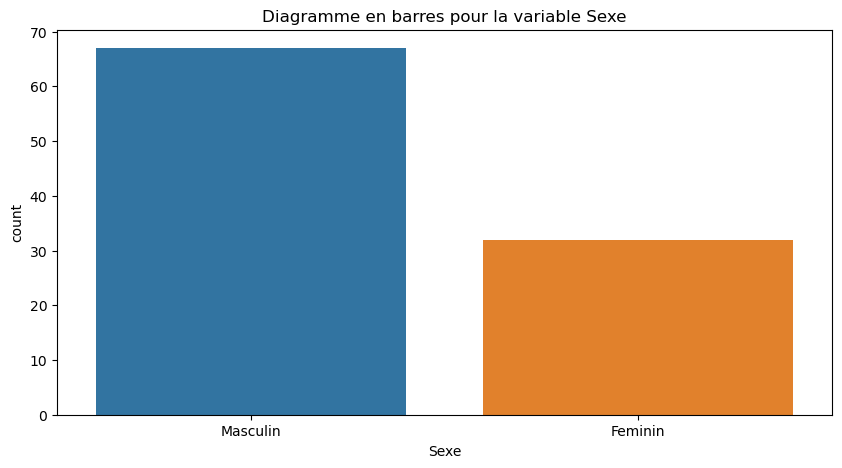

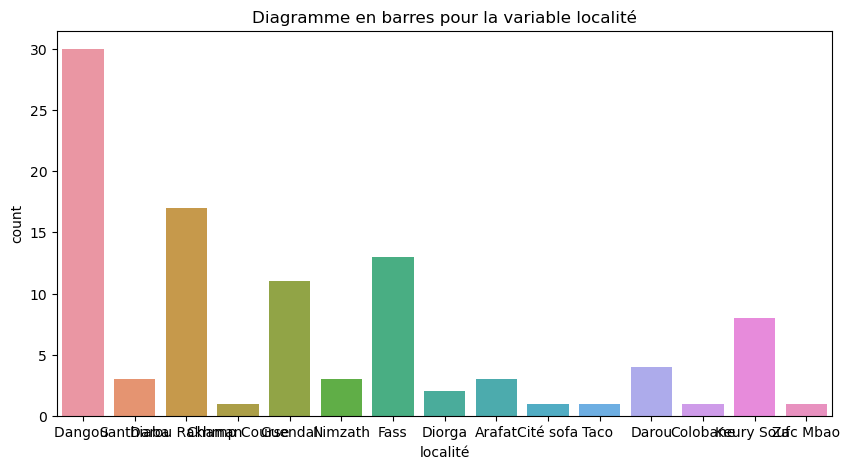

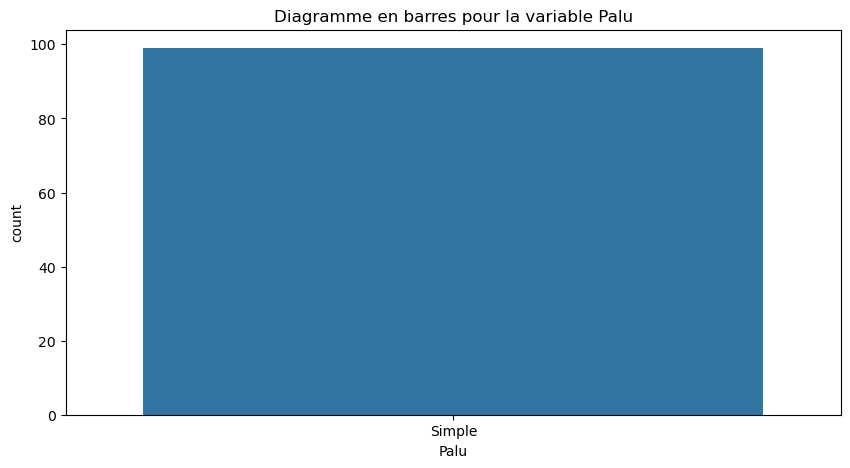

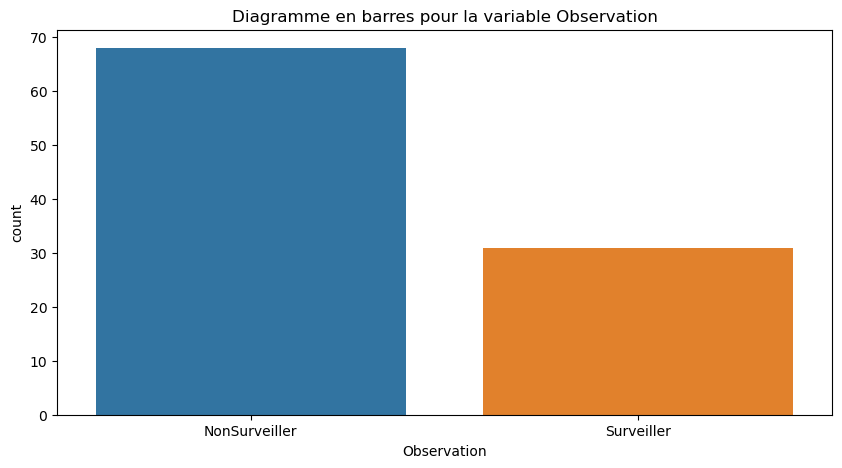

In [44]:
# Créer des graphiques pour les variables qualitative
for col in colonne_qualitative:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=base1_consultation)
    plt.title(f"Diagramme en barres pour la variable {col}")
    plt.show()


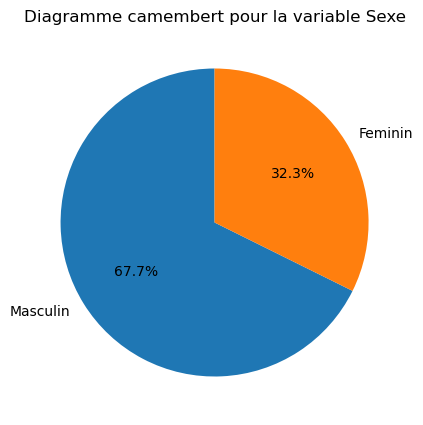

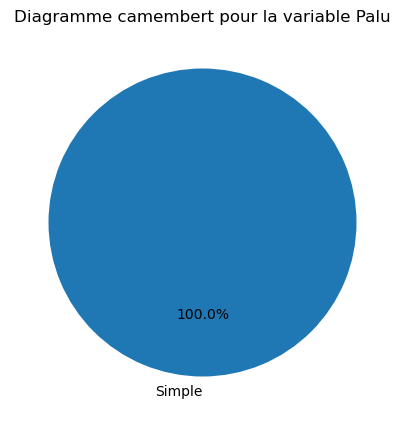

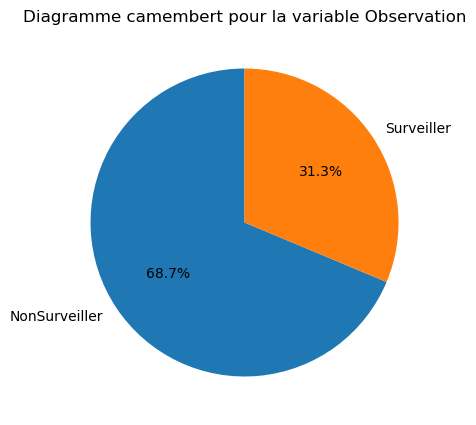

In [50]:
# Liste des variables qualitatives sans localité
sans_colonne_qualitative = ['Sexe', 'Palu', 'Observation']

# Boucle sur chaque variable qualitative
for col in sans_colonne_qualitative:
    plt.figure(figsize=(10, 5))
    base1_consultation[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Diagramme camembert pour la variable {col}")
    plt.ylabel('')
    plt.show()

## Variables Quantitatives

In [52]:
#Statistique des variables quantitatives
colonne_quantitatives = base1_consultation[["Age ", "Temperature (T°c)"]]
colonne_quantitatives.describe()

,Age,Temperature (T°c)
count,99.000000,99.000000
mean,28.171717,37.610101
std,17.880008,1.121451
min,7.000000,35.500000
25%,15.000000,36.800000
50%,22.000000,37.500000
75%,40.000000,38.200000
max,88.000000,40.600000


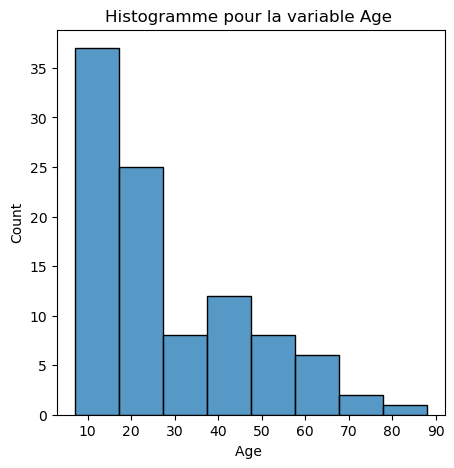

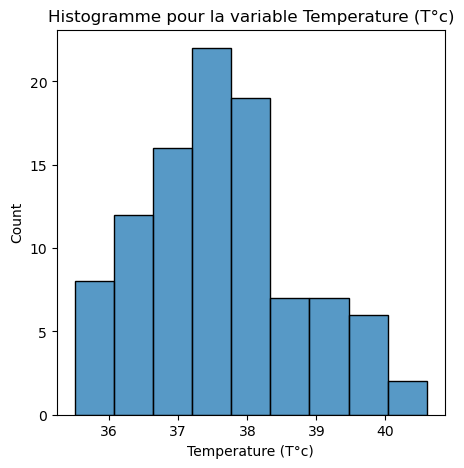

In [59]:
#Histogramme des variables qualicatives 
colonne_quantitatives = ['Age ', 'Temperature (T°c)']

#Boucle sur chaque variables quantitatives 
for col in colonne_quantitatives:
    plt.figure(figsize=(5, 5))
    sns.histplot(base1_consultation[col])
    plt.title(f"Histogramme pour la variable {col}")
    plt.show()


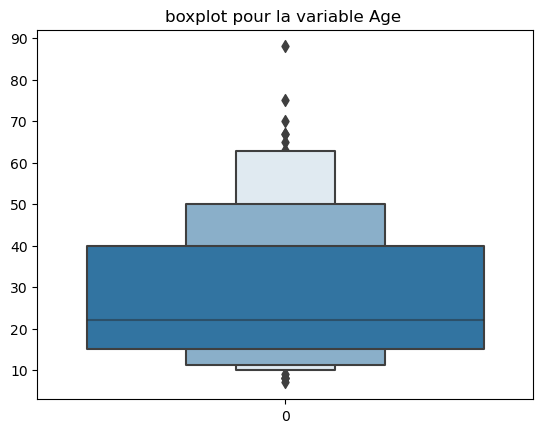

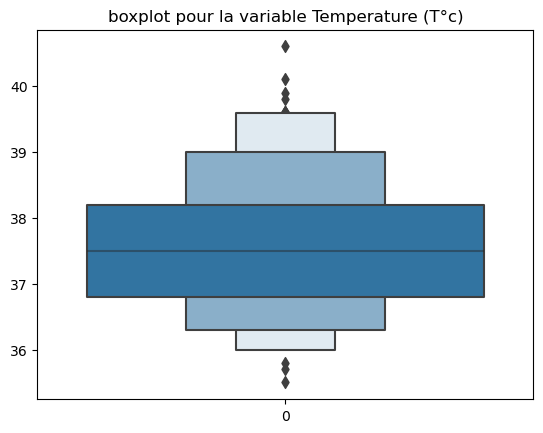

In [60]:
#Boxplot des variables quantitative
colonne_quantitatives = ['Age ', 'Temperature (T°c)']

#Boucle sur chaque variables quantitatives 
for col in colonne_quantitatives:
    sns.boxenplot(base1_consultation[col])
    plt.title(f"boxplot pour la variable {col}")
    plt.show()


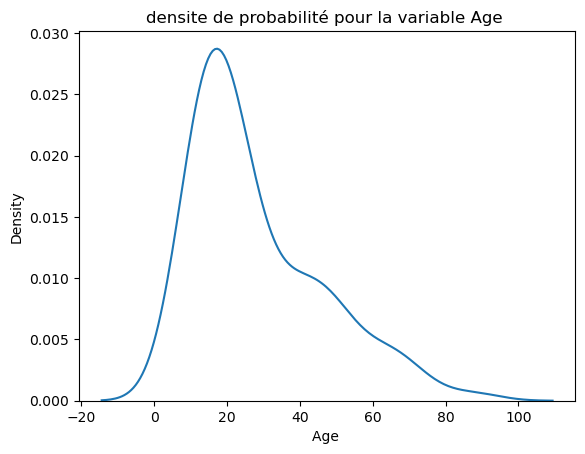

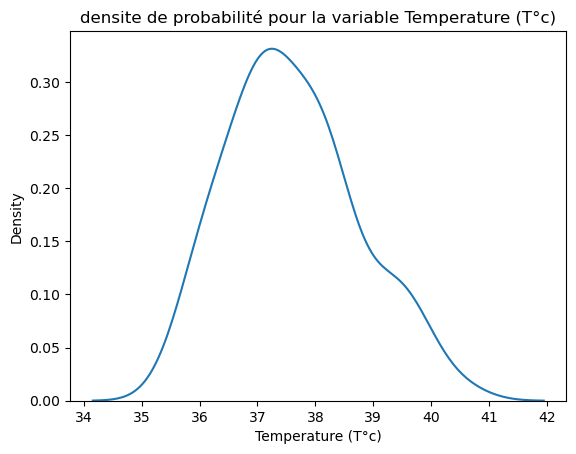

In [63]:
#Courbe de densité 
colonne_quantitatives = ['Age ', 'Temperature (T°c)']

#Boucle sur chaque variables quantitatives 
for col in colonne_quantitatives:
    sns.kdeplot(base1_consultation[col])
    plt.title(f"densite de probabilité pour la variable {col}")
    plt.show()


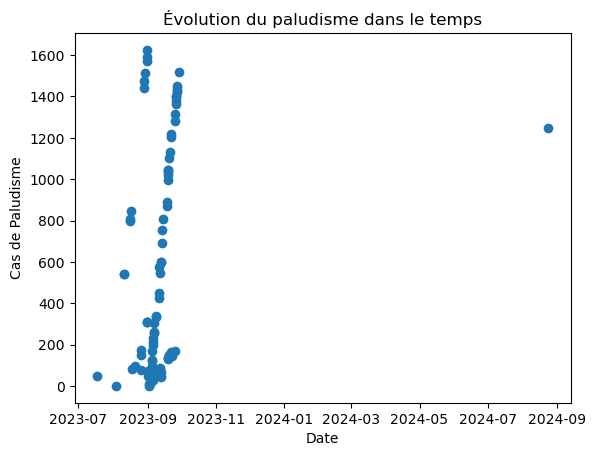

In [13]:
# Tracer le graphique
x = base1_consultation["Date "]
y = base1_consultation["Id_Co"]
 # Définit la taille du graphique (optionnel)
plt.plot_date(x,y)
# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Cas de Paludisme')
plt.title('Évolution du paludisme dans le temps')

plt.show()

## Analyse Bivarié

### Tableau de contingence 

In [88]:
## Liste des variables qualitatives
colonne_qualitative = ["Sexe", "localité", "Palu", "Observation"] 
#Tableau de contingence entre deux variables 
# Créer des tableaux de contingence
for col1 in colonne_qualitative:
    for col2 in colonne_qualitative:
        if col1 != col2:
            # Afficher le tableau de contingence entre les deux variables
            tables_contingence = pd.crosstab(base1_consultation[col1], base1_consultation[col2])
            print(f"Tableau de contingence entre {col1} et {col2}:\n", tables_contingence, "\n")

Tableau de contingence entre Sexe et localité:
 localité  Arafat  Champ Course  Cité sofa  Colobane  Dangou   Darou  \
Sexe                                                                  
Feminin        3             0          0         0        7      3   
Masculin       0             1          1         1       23      1   

localité  Darou Rakhman  Diorga  Fass  Guendal  Keury Souf   Nimzath  \
Sexe                                                                   
Feminin               1       1     3        5            4        3   
Masculin             16       1    10        6            4        0   

localité  Santhiaba  Taco   Zac Mbao  
Sexe                                  
Feminin           2      0         0  
Masculin          1      1         1   

Tableau de contingence entre Sexe et Palu:
 Palu      Simple
Sexe            
Feminin       32
Masculin      67 

Tableau de contingence entre Sexe et Observation:
 Observation  NonSurveiller  Surveiller
Sexe            

In [100]:
#Proportion option normalize
#Liste des variables qualitatives
colonne_qualitative = ["Sexe", "localité", "Palu", "Observation"] 
# Créer des tableaux de proportions
for col1 in colonne_qualitative:
    for col2 in colonne_qualitative:
        if col1 != col2:
            # Calculer les proportions pour le graphique bivarié
            proportions = base1_consultation.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100
            print(f"Tableau de proportions entre {col1} et {col2}:\n{proportions}\n")

Tableau de proportions entre Sexe et localité:
        Sexe       localité  Count  Proportion
0    Feminin         Arafat      3    9.375000
1    Feminin        Dangou       7   21.875000
2    Feminin          Darou      3    9.375000
3    Feminin  Darou Rakhman      1    3.125000
4    Feminin         Diorga      1    3.125000
5    Feminin           Fass      3    9.375000
6    Feminin        Guendal      5   15.625000
7    Feminin    Keury Souf       4   12.500000
8    Feminin        Nimzath      3    9.375000
9    Feminin      Santhiaba      2    6.250000
10  Masculin   Champ Course      1    1.492537
11  Masculin      Cité sofa      1    1.492537
12  Masculin       Colobane      1    1.492537
13  Masculin        Dangou      23   34.328358
14  Masculin          Darou      1    1.492537
15  Masculin  Darou Rakhman     16   23.880597
16  Masculin         Diorga      1    1.492537
17  Masculin           Fass     10   14.925373
18  Masculin        Guendal      6    8.955224
19  Masculin 

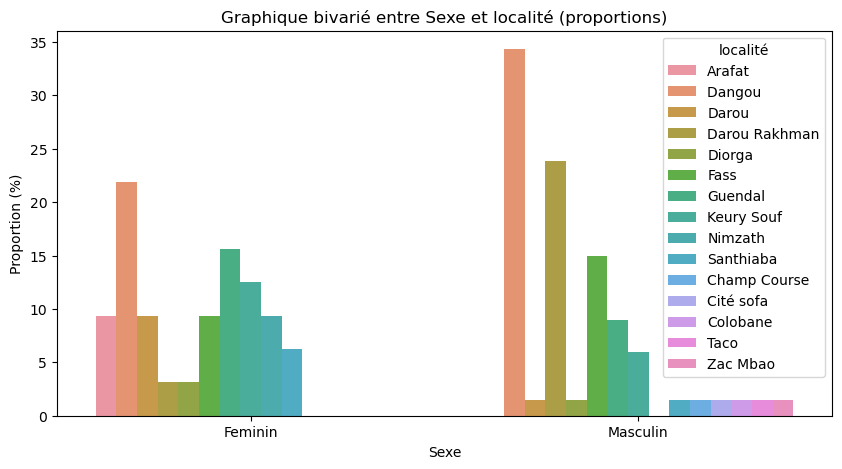

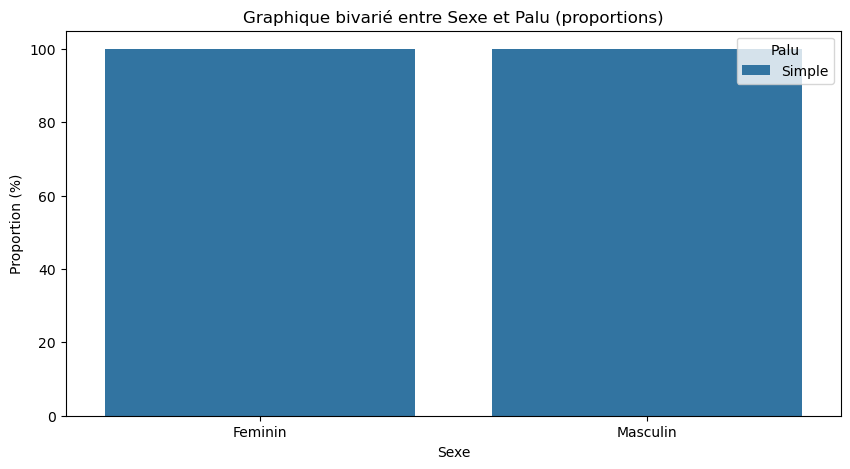

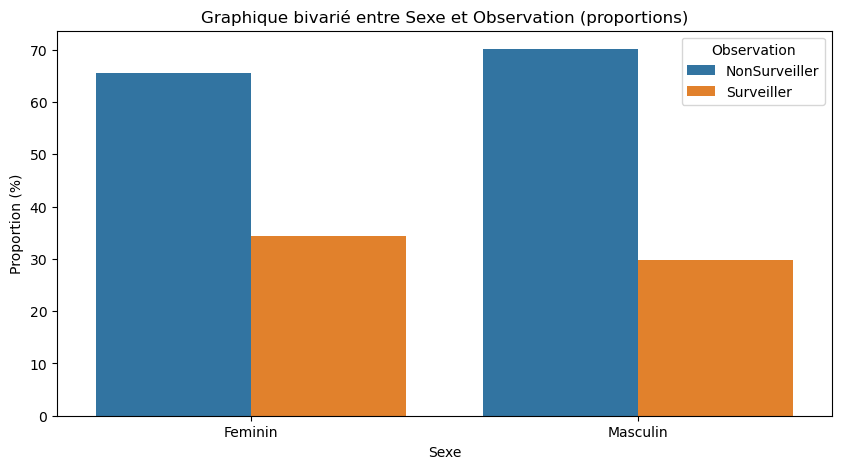

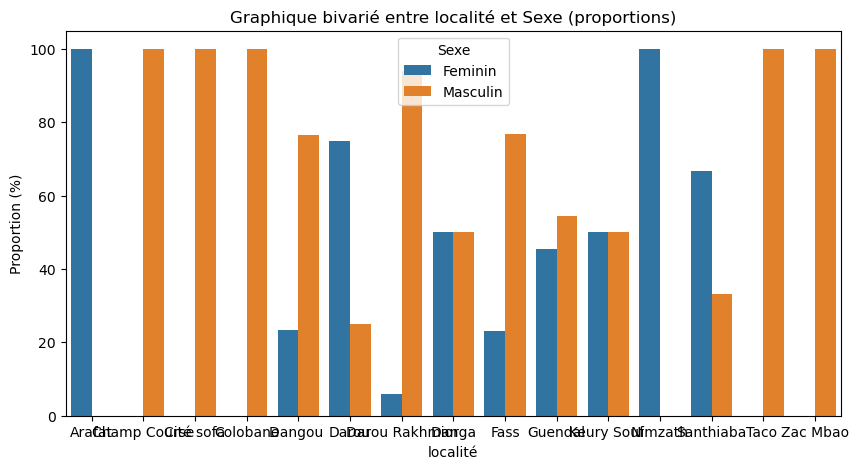

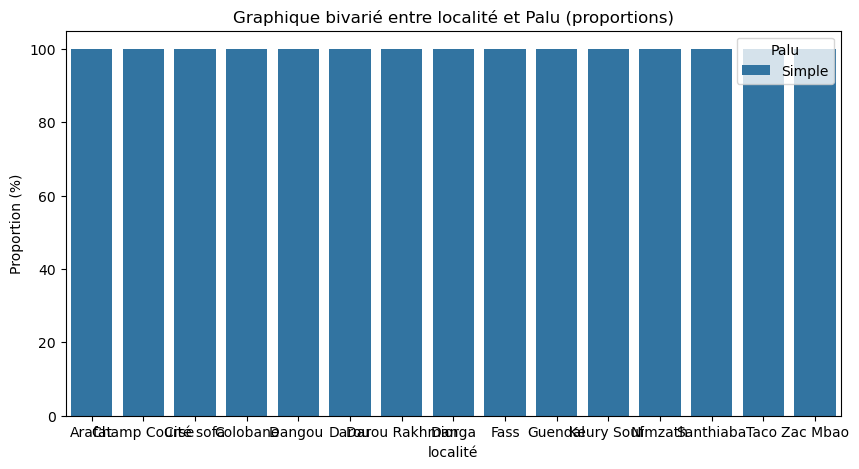

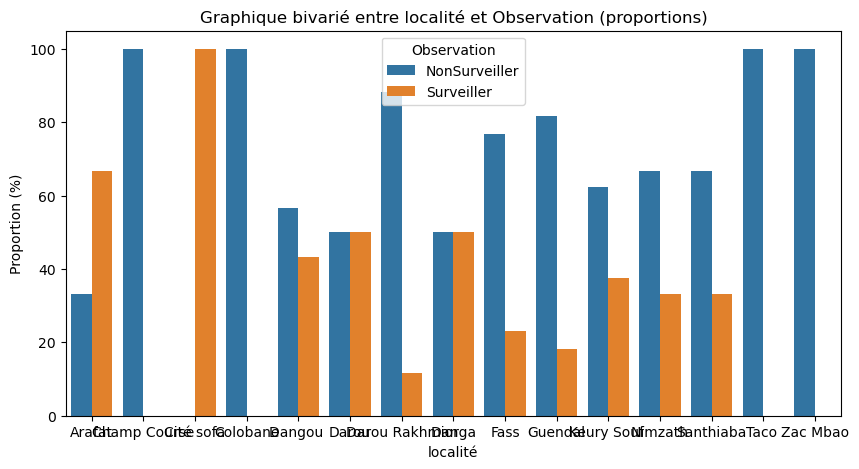

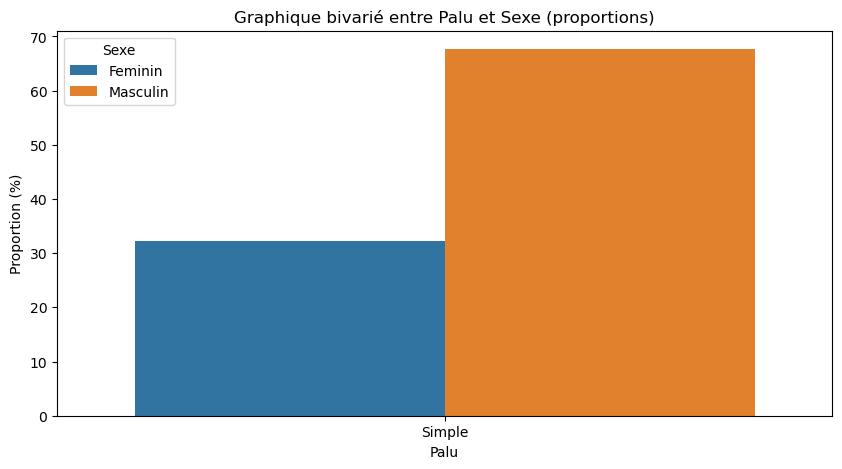

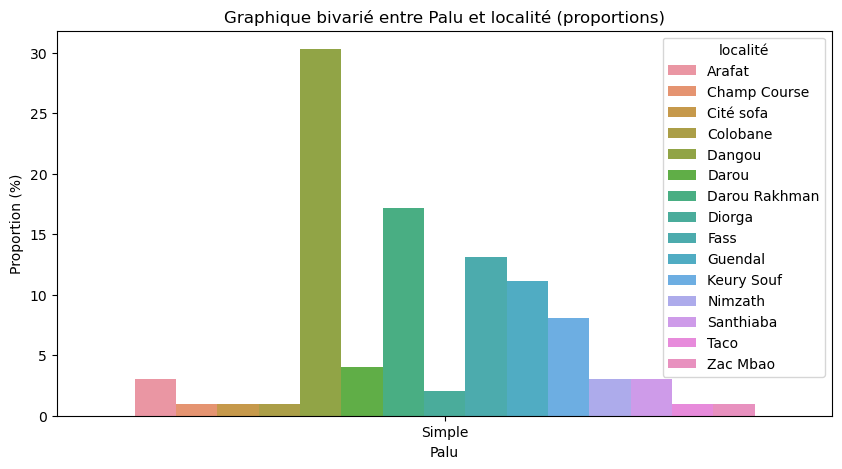

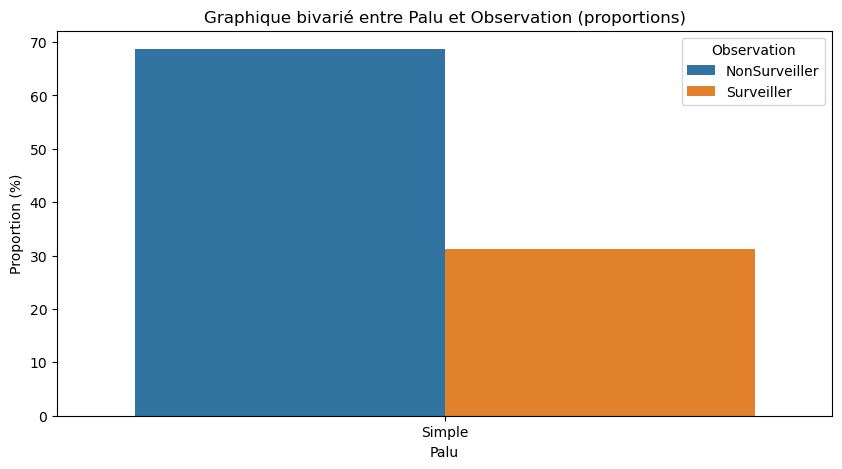

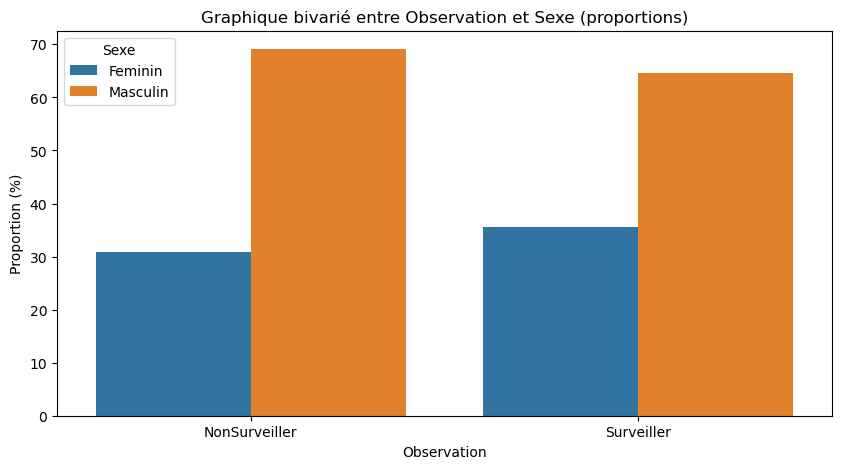

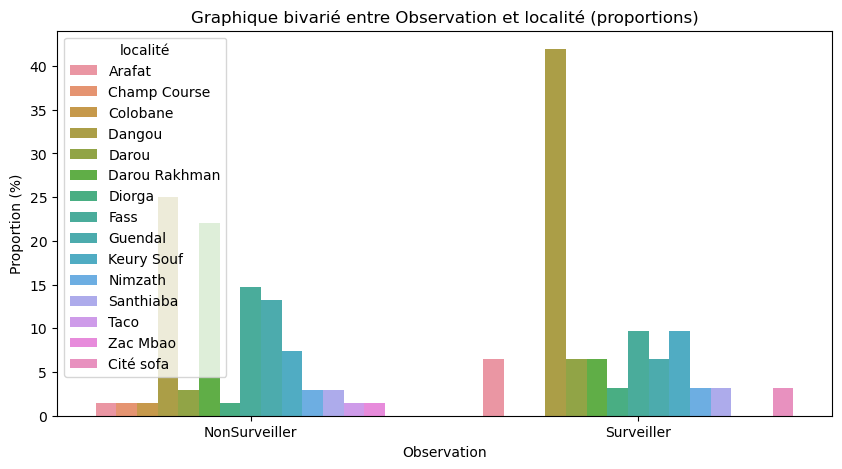

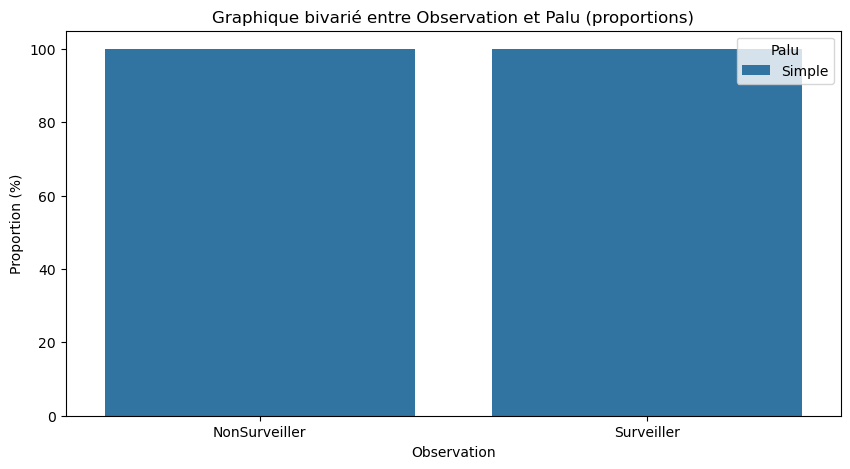

In [103]:
#Liste des variables qualitatives
colonne_qualitative = ["Sexe", "localité", "Palu", "Observation"] 
# Créer des graphique de proportions
for col1 in colonne_qualitative:
    for col2 in colonne_qualitative:
        if col1 != col2:
            
            # Calculer les proportions pour le graphique bivarié
            proportions = base1_consultation.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100
            
            
            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.xlabel(col1)
            plt.legend(title=col2)
            plt.show()

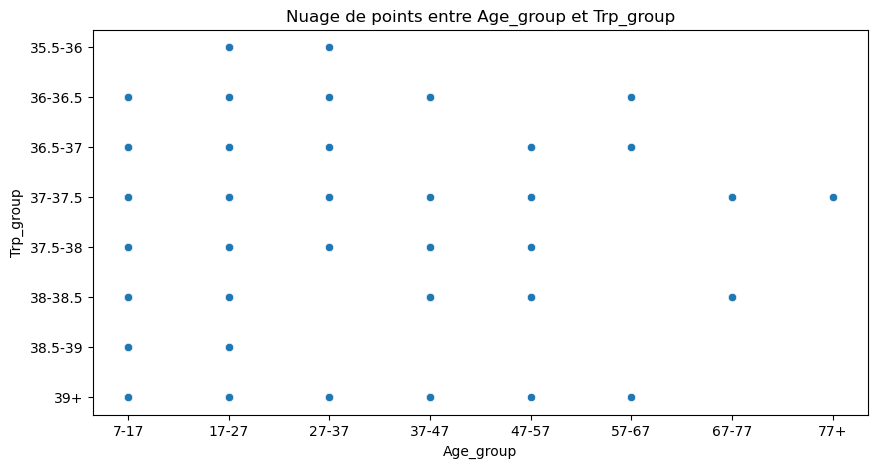

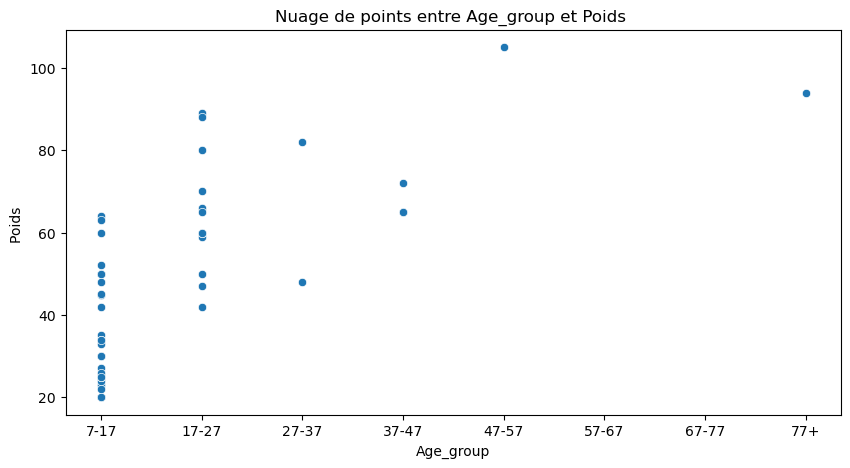

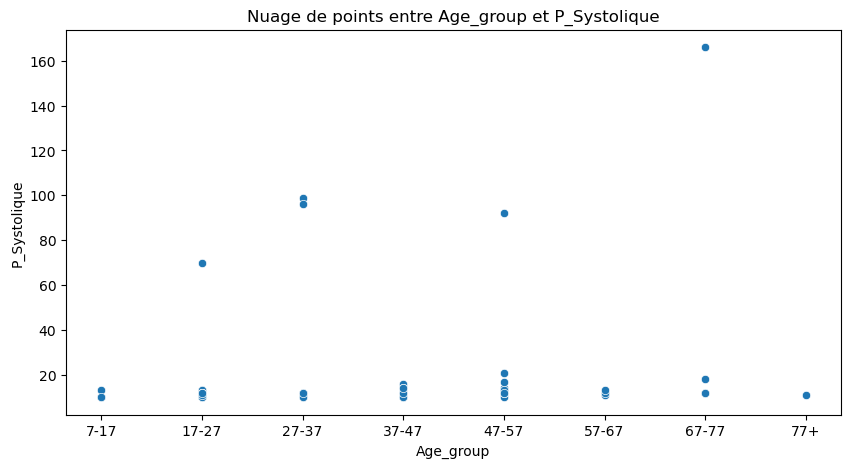

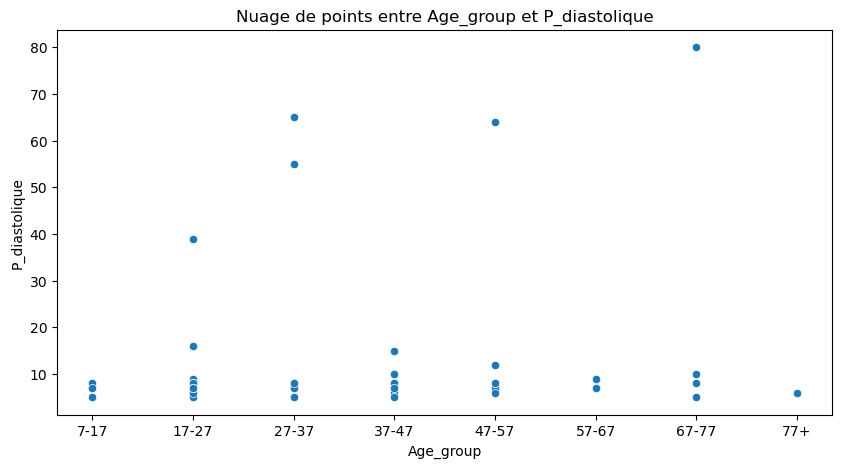

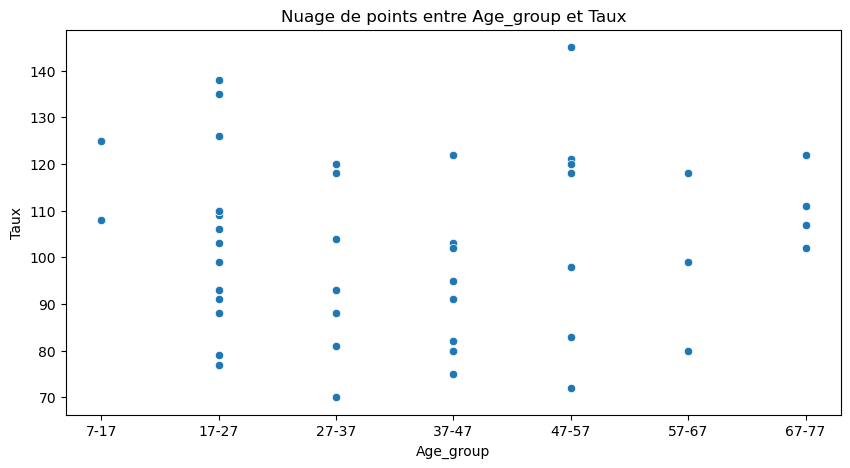

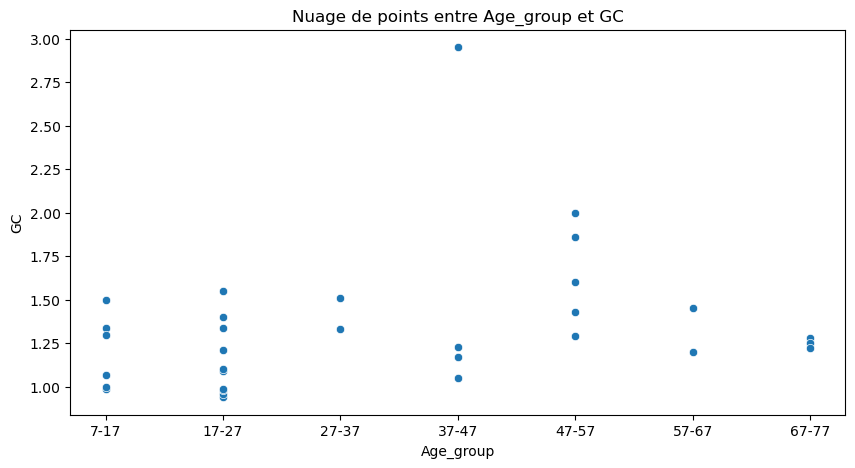

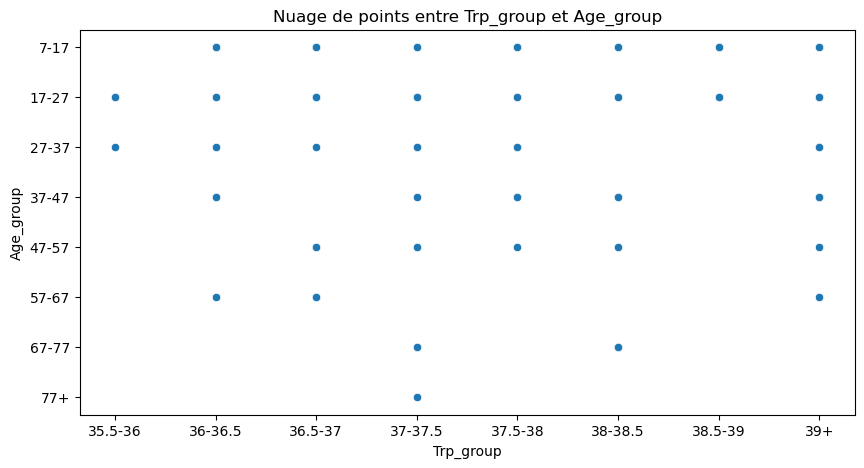

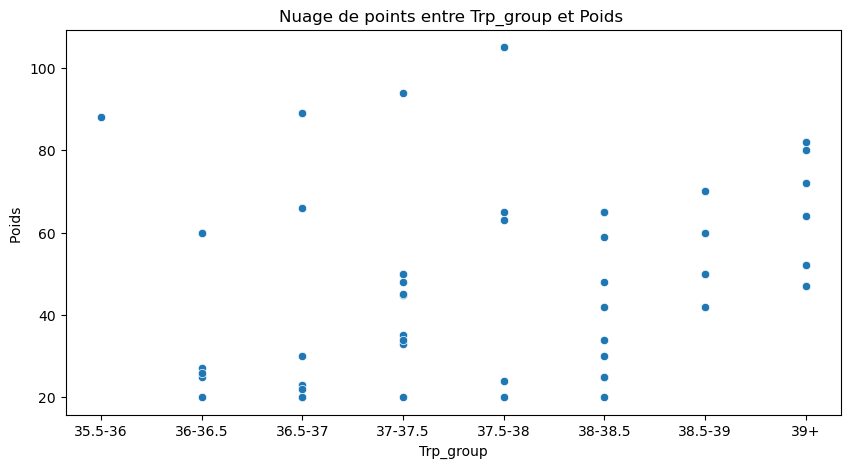

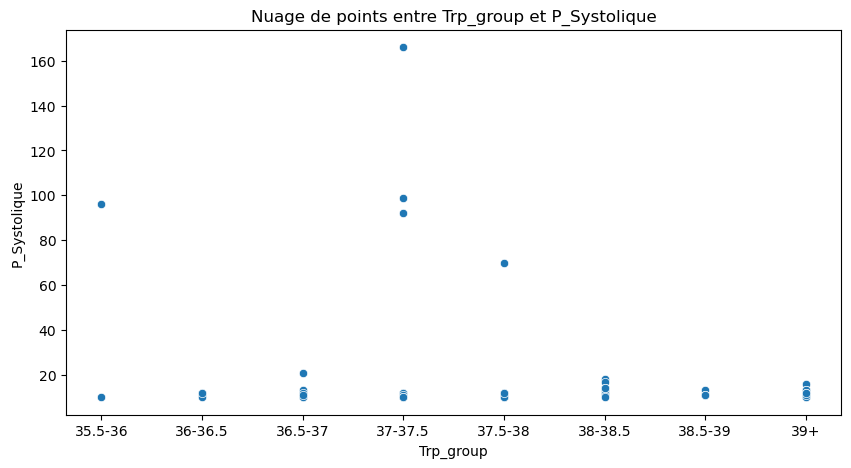

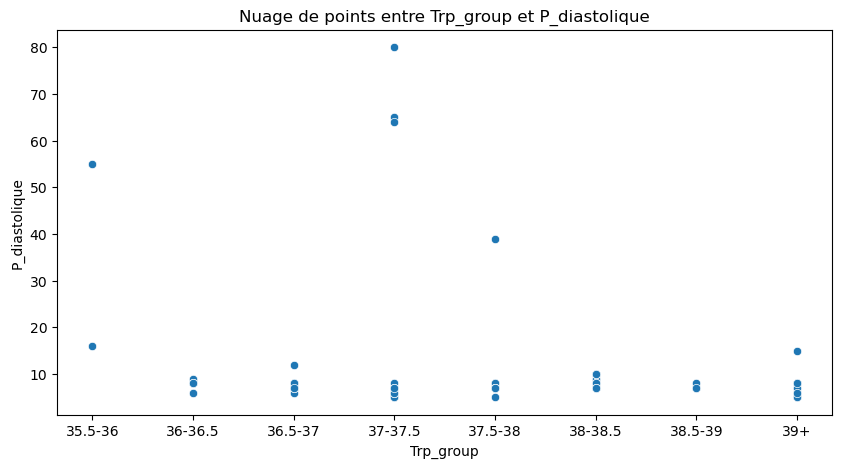

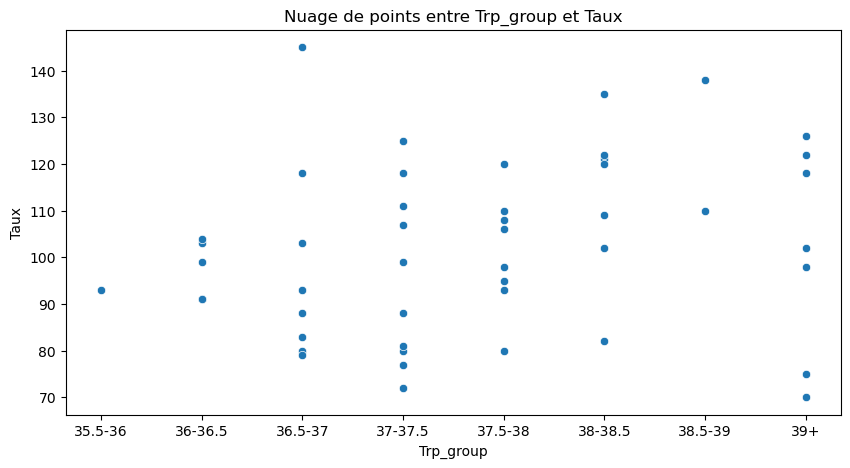

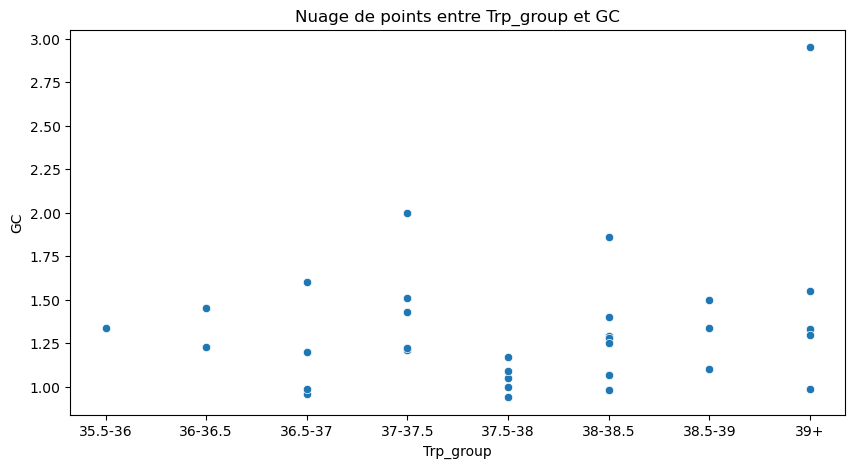

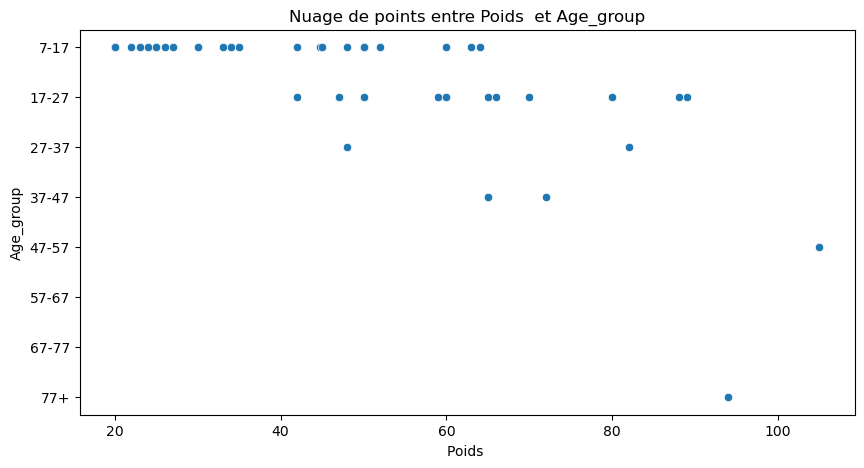

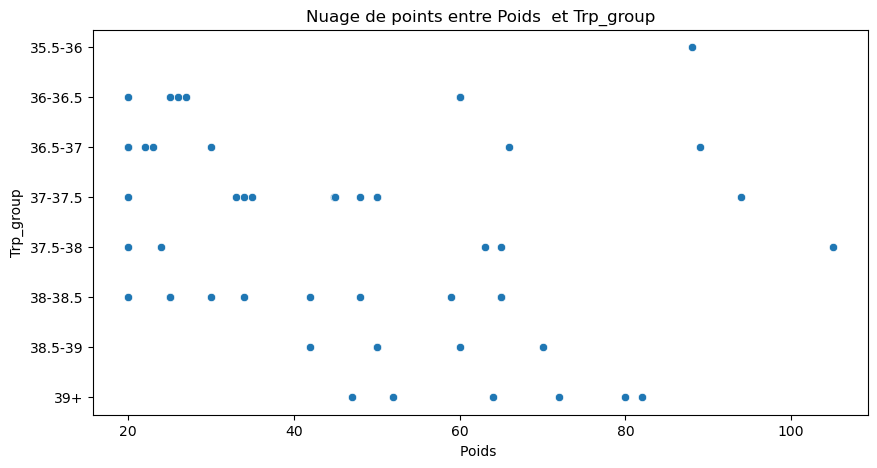

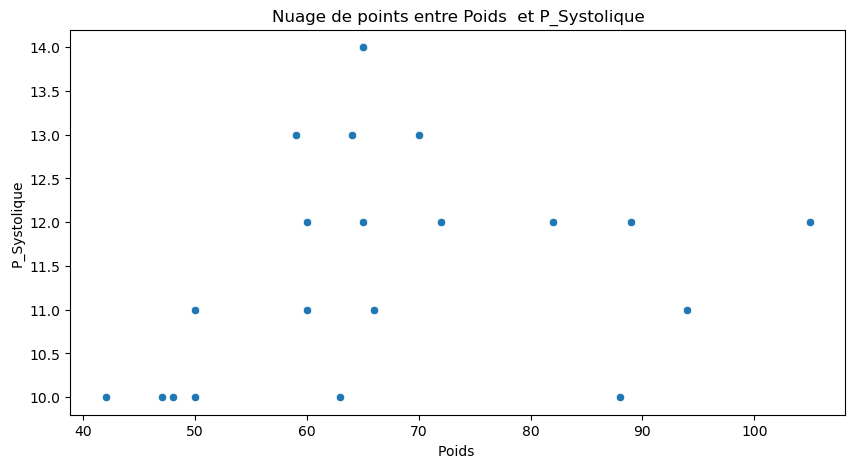

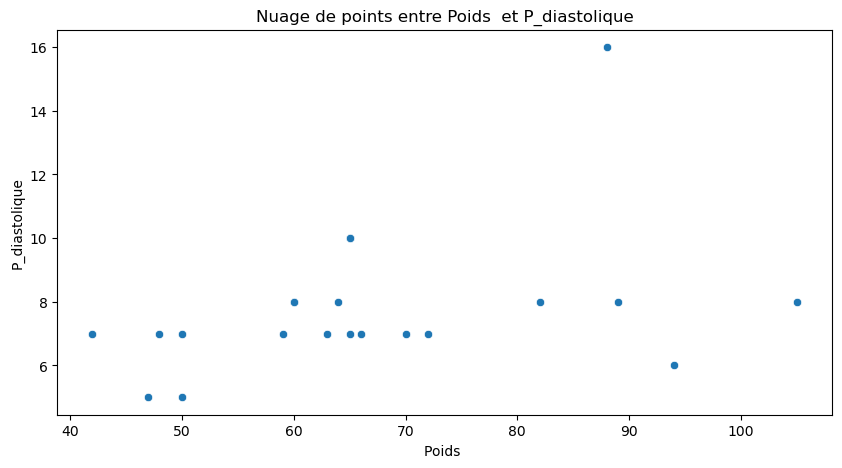

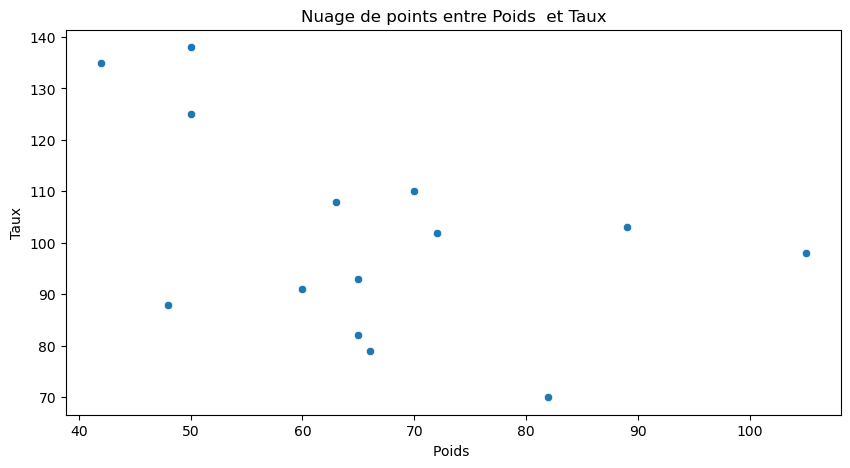

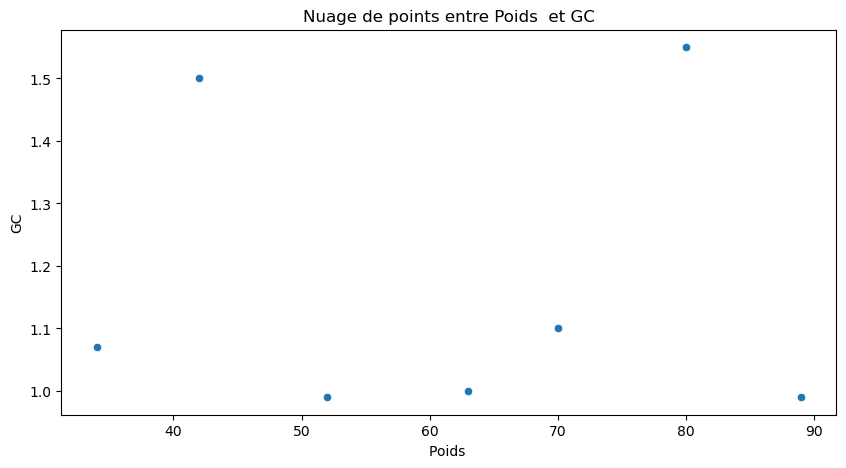

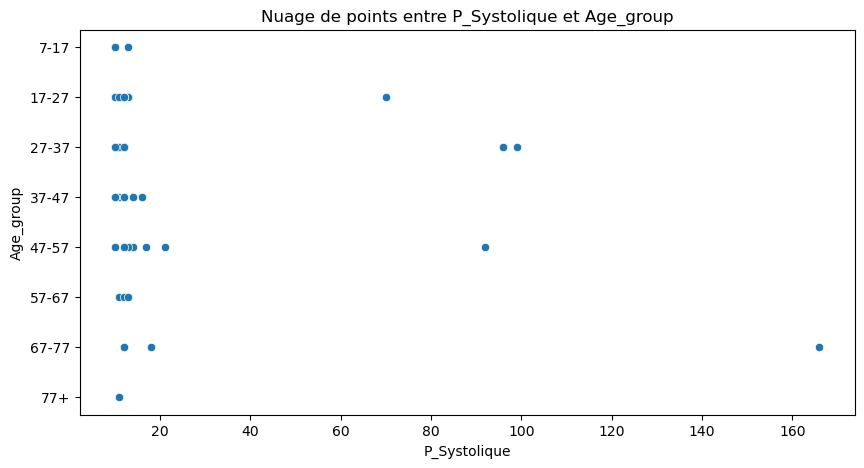

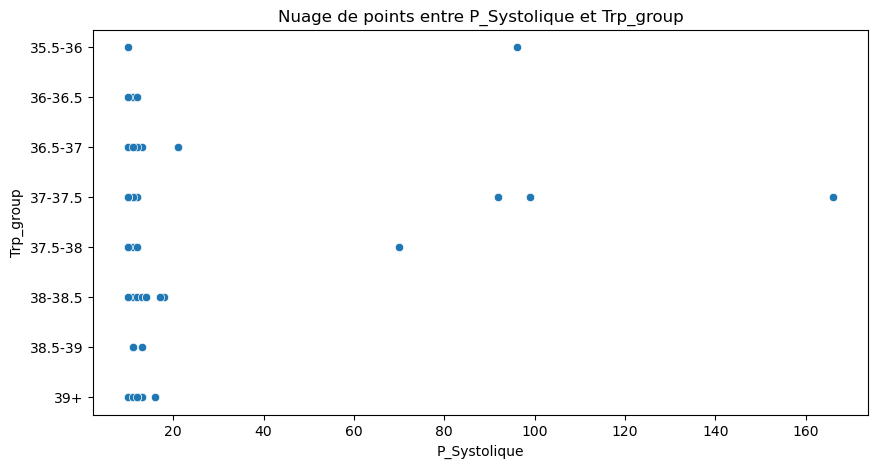

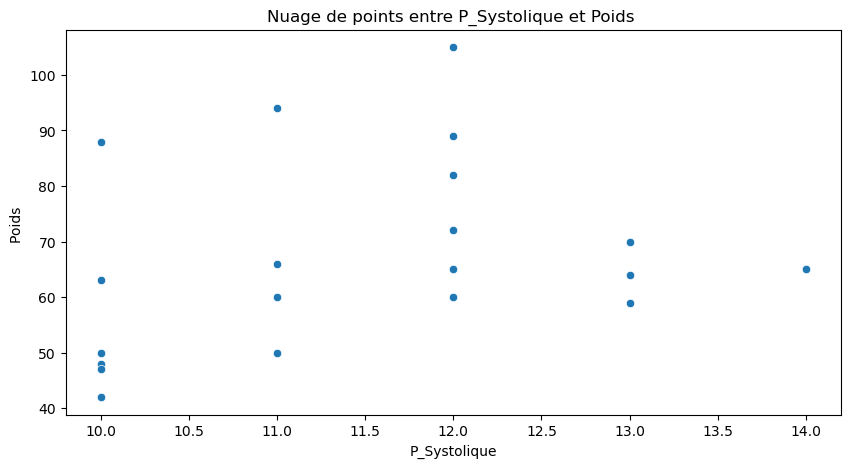

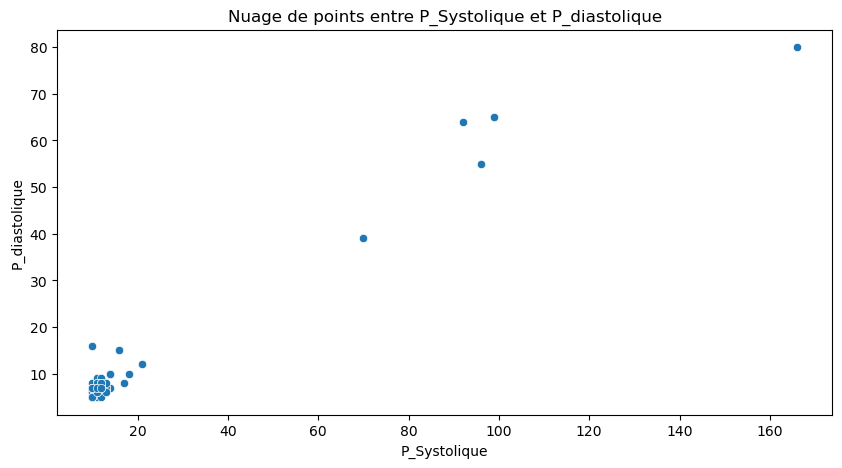

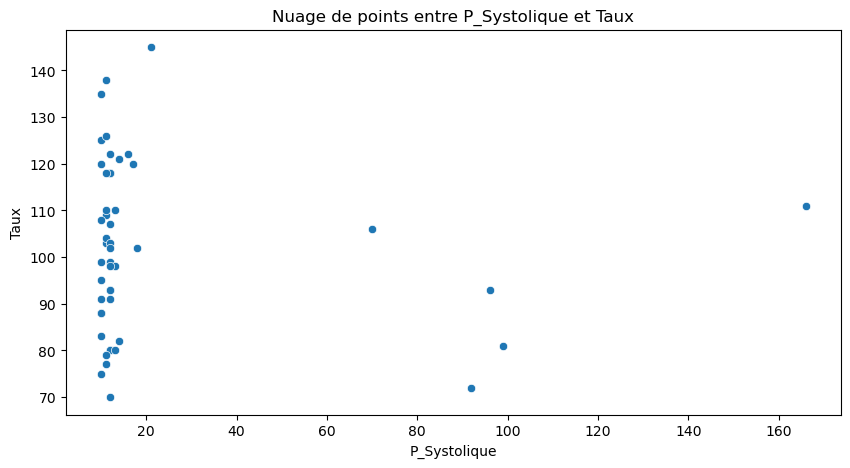

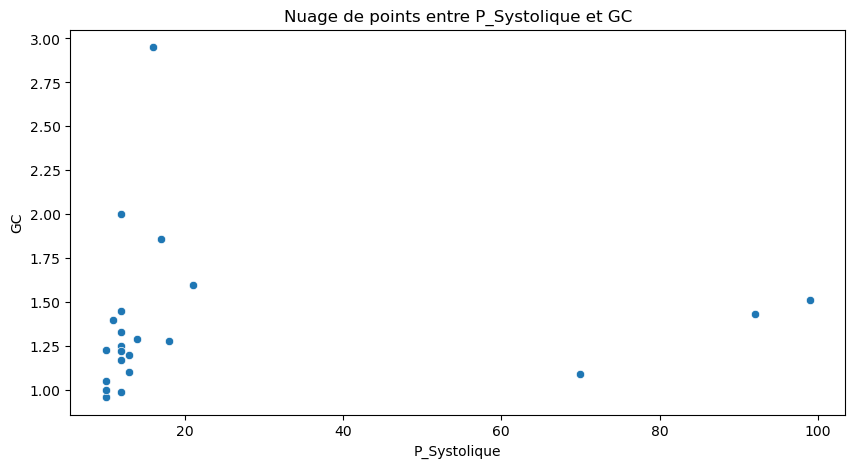

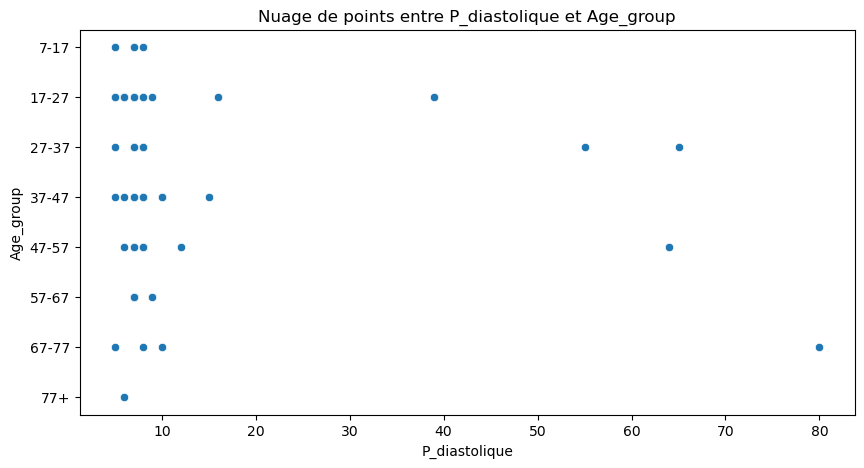

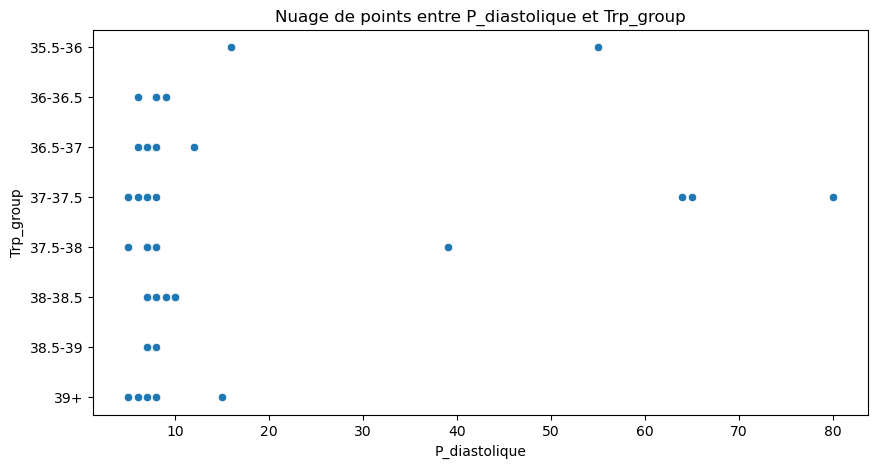

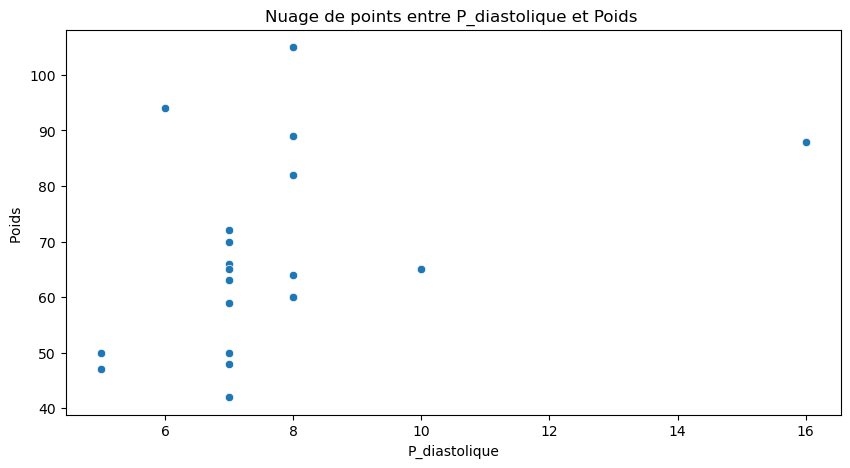

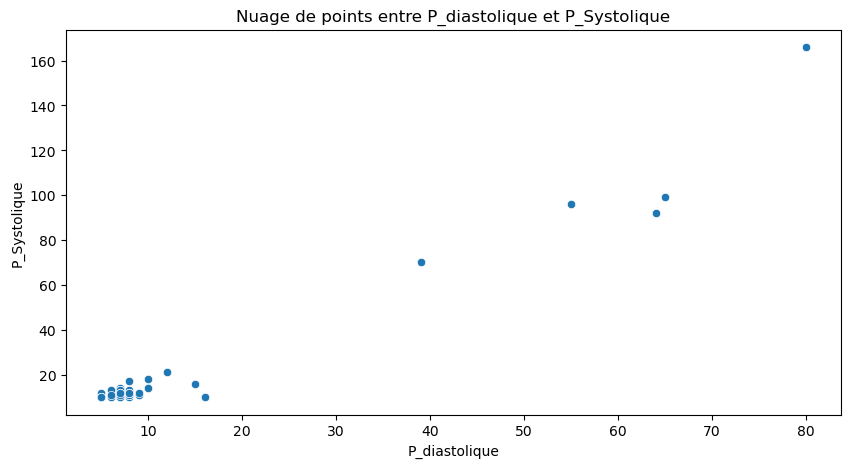

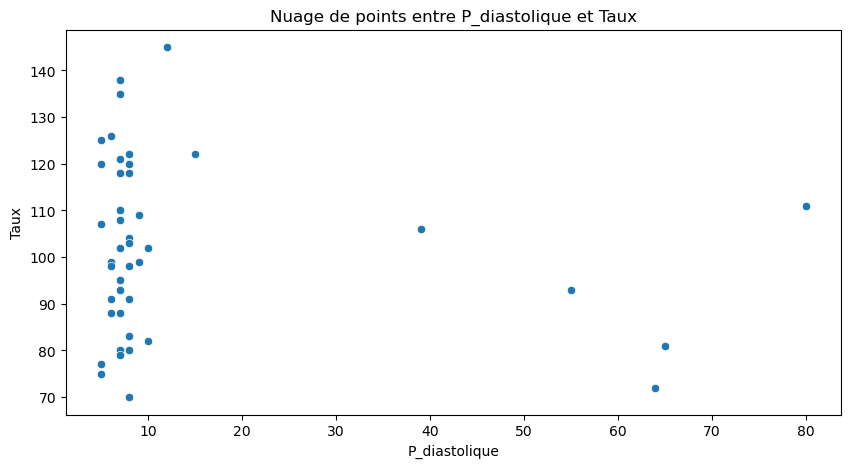

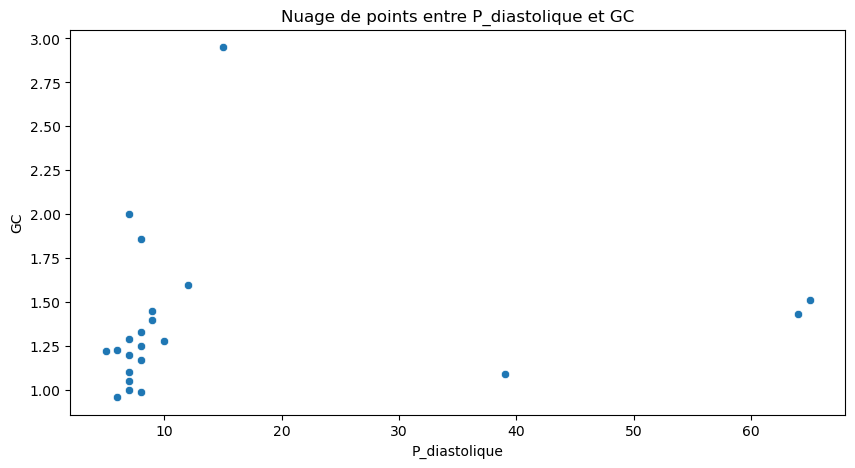

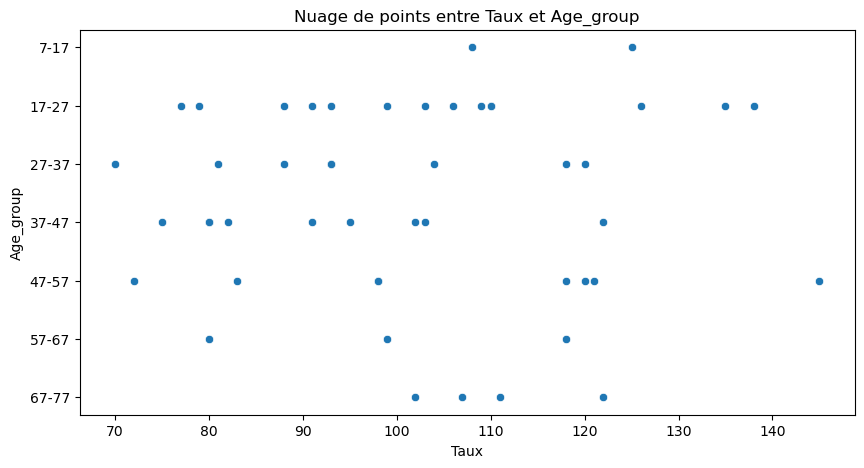

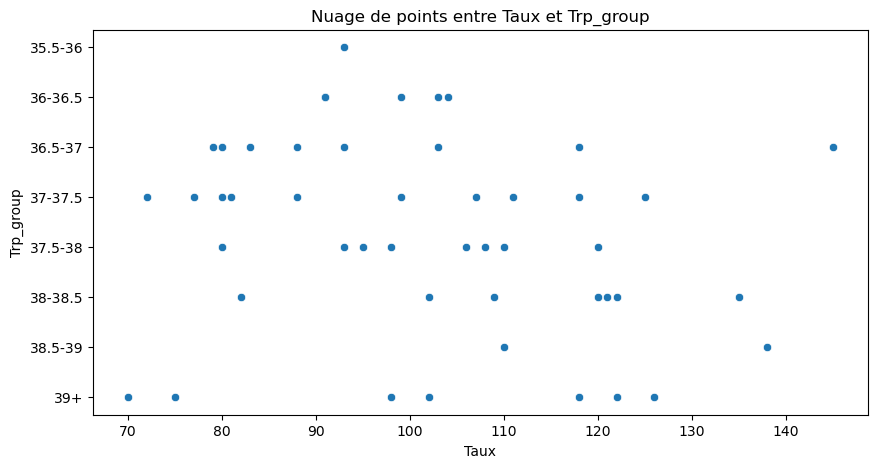

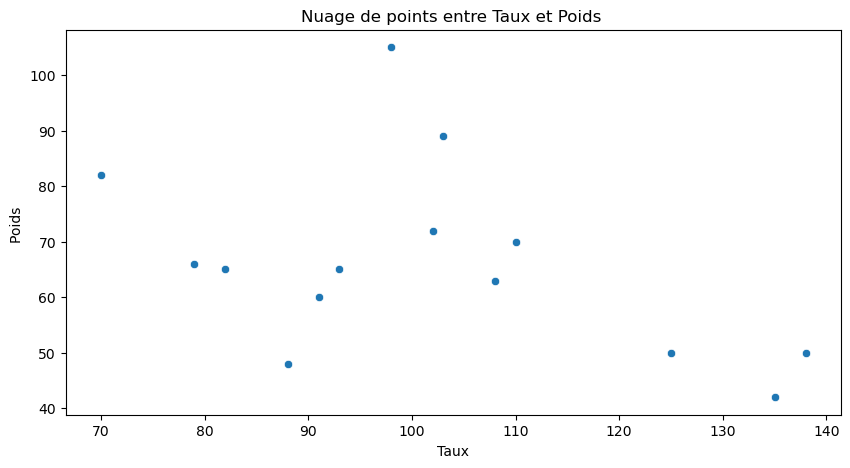

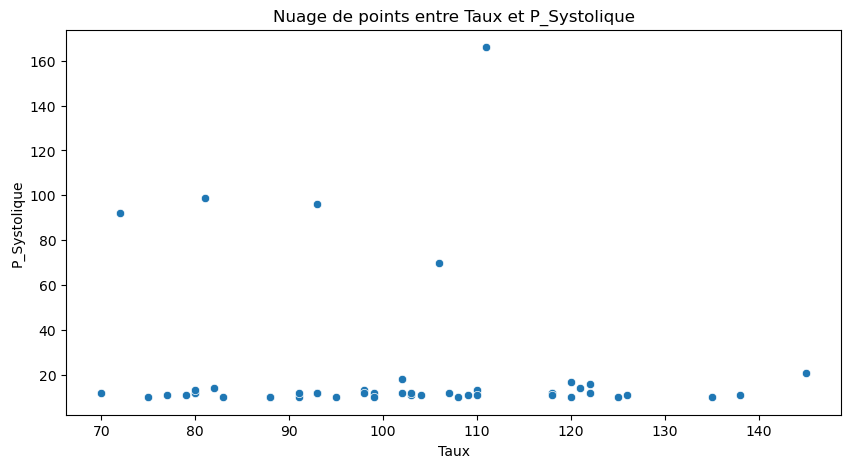

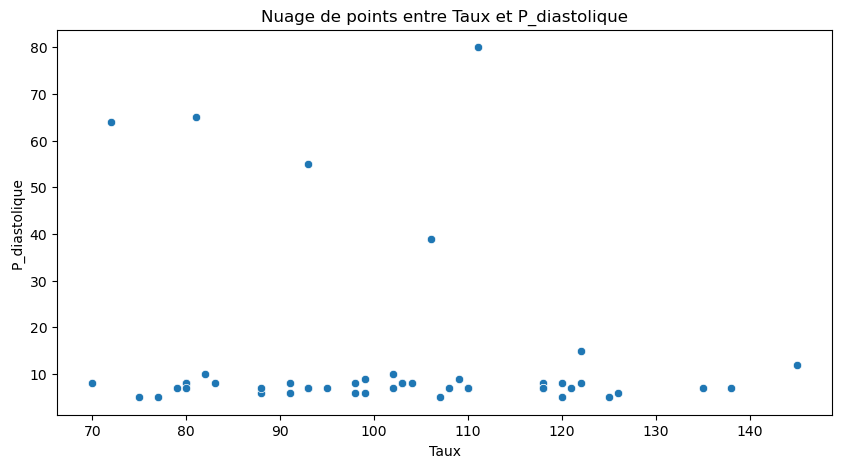

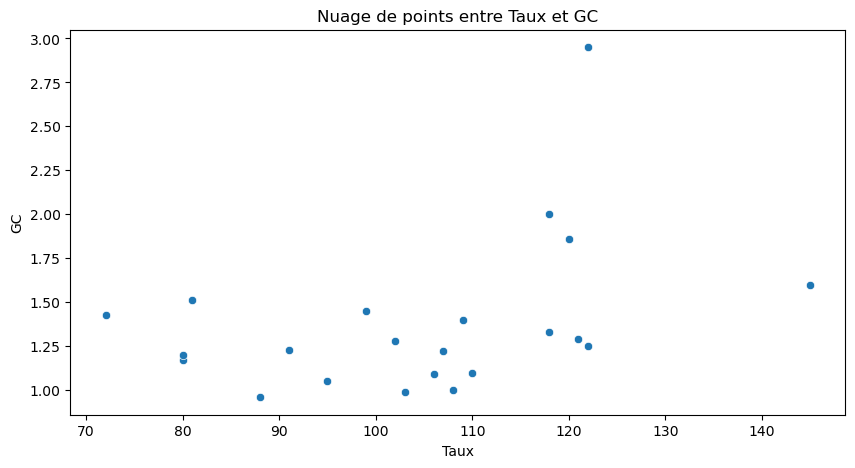

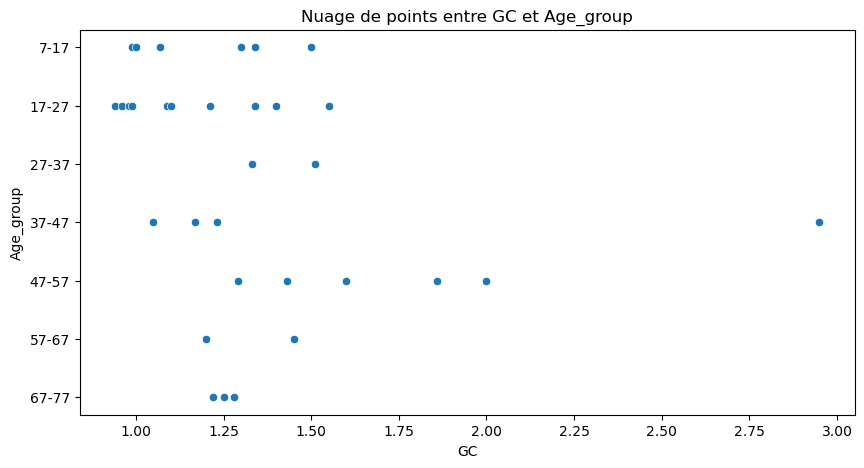

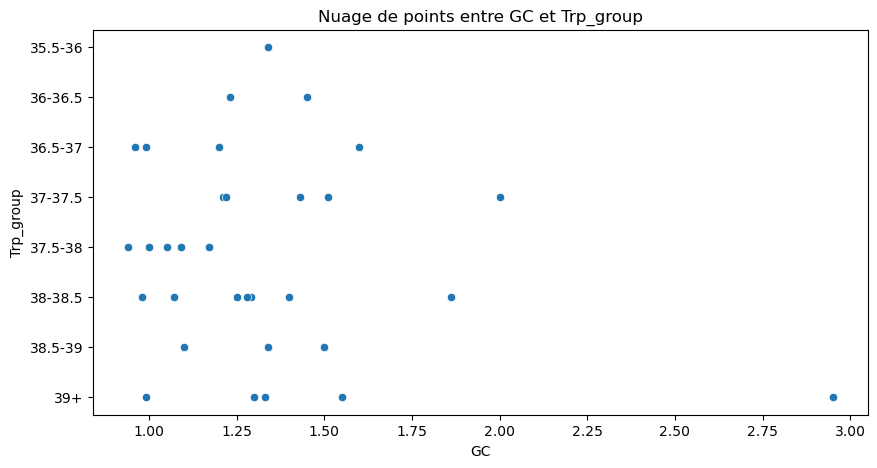

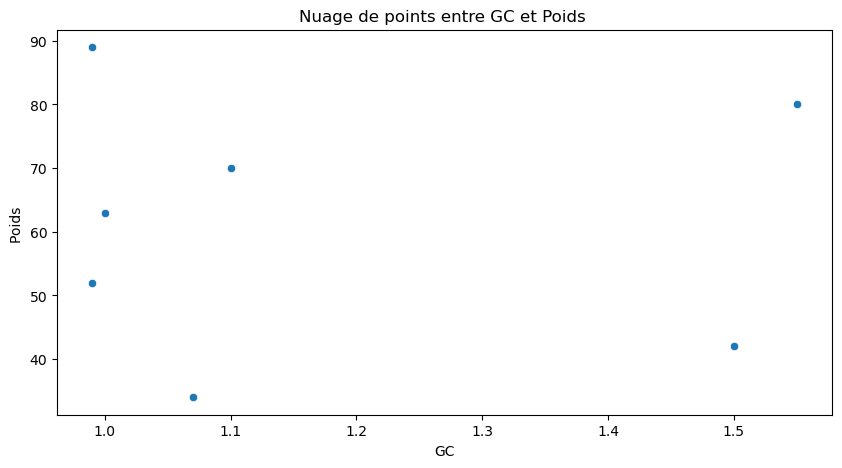

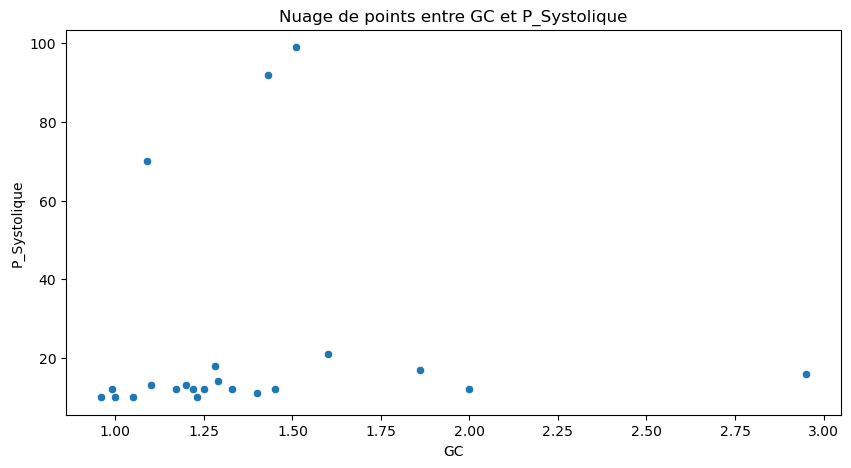

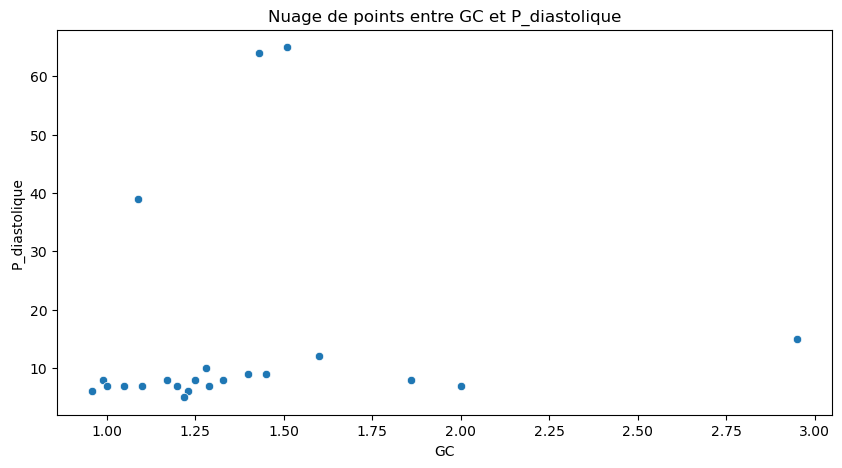

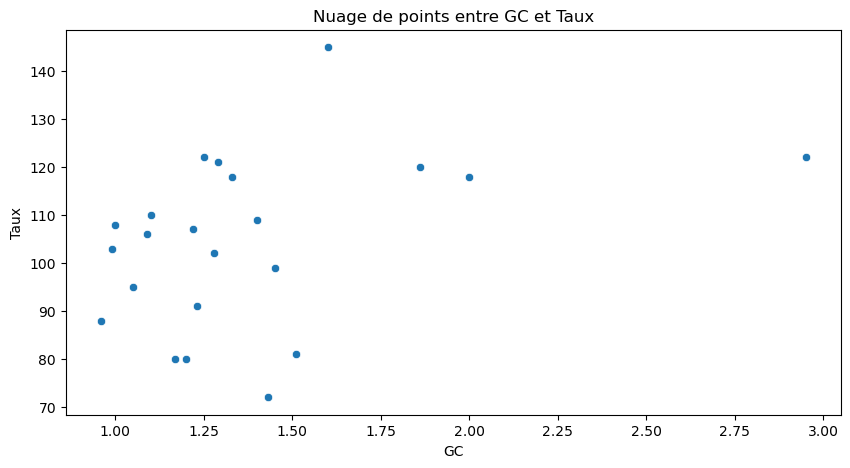

In [110]:
#Listes des variables quantitatives
col_quant = ["Age_group", "Trp_group", "Poids ", "P_Systolique", "P_diastolique", "Taux", "GC"]
# Nuage de point entre deux variables quantitative 
for col1 in col_quant:
    for col2 in col_quant:
        if col1 != col2:
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=col1, y=col2, data=base1_consultation)
            plt.title(f"Nuage de points entre {col1} et {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()





In [115]:
#Listes des variables quantitatives
col_quant = ["Age ", "Temperature (T°c)", "Poids ", "P_Systolique", "P_diastolique", "Taux", "GC"]
#Filtrer la base pour avoir les variables quantitatives simplement
base_quant = base1_consultation[col_quant]
base_quant.head()

,Age,Temperature (T°c),Poids,P_Systolique,P_diastolique,Taux,GC
0,8,36.0,20.0,NaN,NaN,NaN,NaN
1,10,36.7,23.0,NaN,NaN,NaN,NaN
2,33,36.9,NaN,12.0,7.0,93.0,NaN
3,16,37.0,44.8,NaN,NaN,NaN,NaN
4,16,38.5,NaN,NaN,NaN,NaN,1.34


In [117]:
#Matrice de correlation 
matrice_corr = base_quant.corr()
matrice_corr

,Age,Temperature (T°c),Poids,P_Systolique,P_diastolique,Taux,GC
Age,1.000000,0.047596,0.710278,0.193468,0.154360,-0.031974,0.267231
Temperature (T°c),0.047596,1.000000,0.265250,-0.172208,-0.203607,0.220475,0.216340
Poids,0.710278,0.265250,1.000000,0.246818,0.379200,-0.445535,-0.025257
P_Systolique,0.193468,-0.172208,0.246818,1.000000,0.979236,-0.105462,0.042624
P_diastolique,0.154360,-0.203607,0.379200,0.979236,1.000000,-0.152531,0.094032
Taux,-0.031974,0.220475,-0.445535,-0.105462,-0.152531,1.000000,0.376293
GC,0.267231,0.216340,-0.025257,0.042624,0.094032,0.376293,1.000000


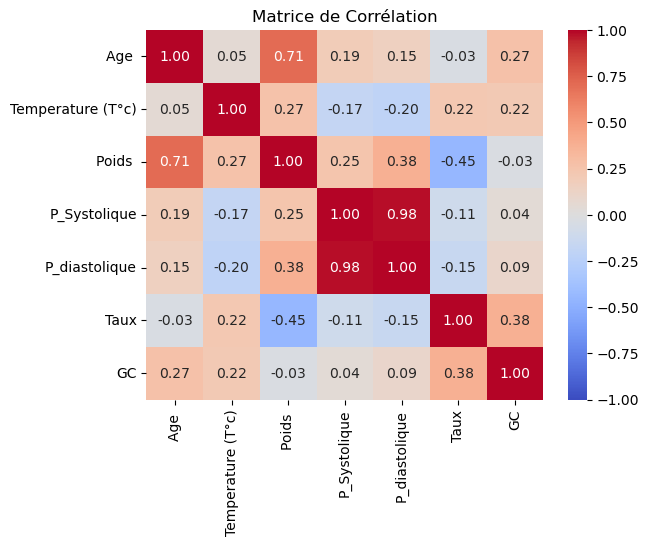

In [122]:
### Graphique matrice de correlation
sns.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

In [124]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Age et Sexe
table_cont1 = pd.crosstab(base1_consultation["Sexe"], base1_consultation["Age_group"])
table_cont1

Age_group,7-17,17-27,27-37,37-47,47-57,57-67,67-77,77+
Sexe,,,,,,,,
Feminin,9,8,3,7,4,1,0,0
Masculin,25,20,5,5,4,3,4,1


In [125]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Age et Observation
table_cont2 = pd.crosstab(base1_consultation["Observation"], base1_consultation["Age_group"])
table_cont2

Age_group,7-17,17-27,27-37,37-47,47-57,57-67,67-77,77+
Observation,,,,,,,,
NonSurveiller,30,20,4,7,3,2,1,1
Surveiller,4,8,4,5,5,2,3,0


In [126]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Age et Palu
table_cont3 = pd.crosstab(base1_consultation["Palu"], base1_consultation["Age_group"])
table_cont3

Age_group,7-17,17-27,27-37,37-47,47-57,57-67,67-77,77+
Palu,,,,,,,,
Simple,34,28,8,12,8,4,4,1


<Axes: xlabel='Age_group'>

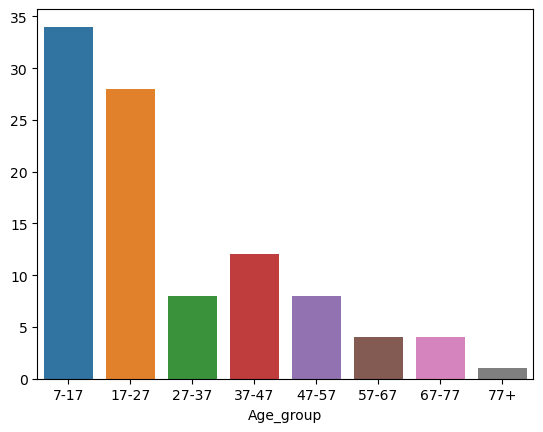

In [127]:
sns.barplot(table_cont3)

In [130]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Tpr et Observation
table_contingence = pd.crosstab(base1_consultation["Observation"], base1_consultation["Trp_group"])
table_contingence

Trp_group,35.5-36,36-36.5,36.5-37,37-37.5,37.5-38,38-38.5,38.5-39,39+
Observation,,,,,,,,
NonSurveiller,2,10,10,15,6,11,4,10
Surveiller,1,2,4,5,6,6,2,5


In [132]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Tpr et Palu
table_contingence1 = pd.crosstab(base1_consultation["Palu"], base1_consultation["Trp_group"])
table_contingence1

Trp_group,35.5-36,36-36.5,36.5-37,37-37.5,37.5-38,38-38.5,38.5-39,39+
Palu,,,,,,,,
Simple,3,12,14,20,12,17,6,15


<Axes: xlabel='Trp_group'>

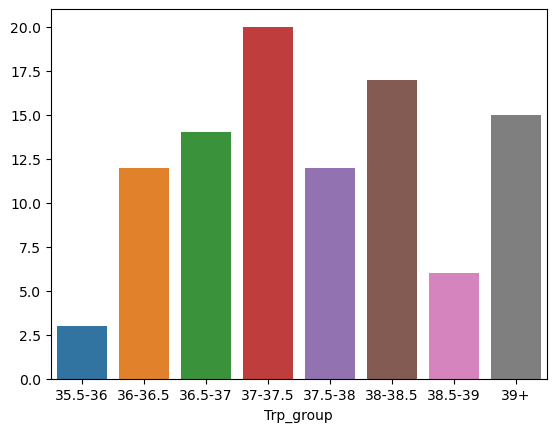

In [133]:
sns.barplot(table_contingence1)

In [136]:
#Tableau croissée entre deux variable quantitative et qualitative 


#Creer un tableau croisser entre Group_Tpr et Sexe
table_contingence2 = pd.crosstab(base1_consultation["Sexe"], base1_consultation["Trp_group"])
table_contingence2

Trp_group,35.5-36,36-36.5,36.5-37,37-37.5,37.5-38,38-38.5,38.5-39,39+
Sexe,,,,,,,,
Feminin,0,4,2,5,5,6,4,6
Masculin,3,8,12,15,7,11,2,9


## Les Tests Statistique

### Test d'une variable quantitative 

In [1]:
from scipy.stats import ttest_1samp

In [4]:
base1_consultation["Age "].mean()

28.171717171717173

### Ho : la moyenne est égale à 28.17
### H1 : la moyenne est différent de 28.17

In [5]:
tset , pval = ttest_1samp(base1_consultation["Age "], 28.17)

print("P-Value", pval)

if pval < 0.05 :
    #Au seuil Alpha est égale à 0.05 ou 5%
    print("On rejette Ho")
else :
    print("on accepte Ho")

P-Value 0.999239506118598
on accepte Ho


In [6]:
base1_consultation["Temperature (T°c)"].mean()

37.61010101010102

### Ho : la moyenne est égale à 37.61
### H1 : la moyenne est différent de 37.61

In [7]:
tset , pval = ttest_1samp(base1_consultation["Temperature (T°c)"], 37.61)

print("P-Value", pval)

if pval < 0.05 :
    #Au seuil Alpha est égale à 0.05 ou 5%
    print("On rejette Ho")
else :
    print("on accepte Ho")

P-Value 0.9992867623137666
on accepte Ho
